# Working with FB Prophet
## begin with [Quick Start](https://facebookincubator.github.io/prophet/docs/quick_start.html) example from FB page  

Lok at time series of daily page views fro the Wikipedia page for Peyton Manning. The csv is available [here](https://github.com/facebookincubator/prophet/blob/master/examples/example_wp_peyton_manning.csv)

In [9]:
peyton_dataset_url = 'https://github.com/facebookincubator/prophet/blob/master/examples/example_wp_peyton_manning.csv'
peyton_filename = '../datasets/example_wp_peyton_manning.csv'

In [3]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [10]:
# NB: this didn't work as of 8/22/17
#import io
#import requests
#s=requests.get(peyton_dataset_url).content
#df=pd.read_csv(io.StringIO(s.decode('utf-8')))#df = pd.read_csv(peyton_dataset_url)

In [11]:
df = pd.read_csv(peyton_filename)

In [12]:
# transform to log scale
df['y']=np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


Fit the model by instantiating a new `Prophet` object. Any settings required for the forecasting procedure are passed to this object upon construction. You then can call this object's `fit` method and pass in the historical dataframe. Fitting should take 1-5 seconds.

In [13]:
m = Prophet()
m.fit(df);

Predictions are then made on a dataframe with a column `ds` containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method `Prophet.make_future_dataframe`. By default it will also include the dates from the history, so we will see the model fit as well.

In [14]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


The `predict` method will assign each row in `future` a predicted value which it names `yhat`. If you pass in historical dates, it will provide an in-sample fit. The `forecast` object here is a new dataframe that includes a column `yhat` with the forecast, as well as columns for components and uncertainty intervals.

In [15]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.213787,7.449531,8.992708
3266,2017-01-16,8.538876,7.824340,9.343745
3267,2017-01-17,8.326293,7.650021,9.060446
3268,2017-01-18,8.158930,7.443720,8.893679
3269,2017-01-19,8.170898,7.511899,8.901292


You can plot the forecast by calling the `Prophet.plot` method and passing in your forecast dataframe

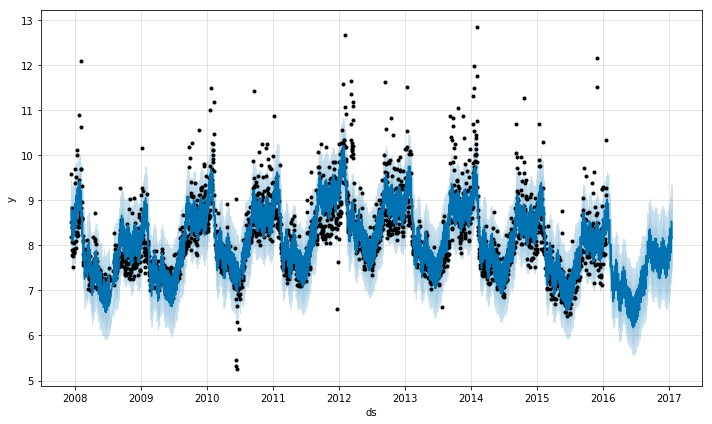

In [16]:
m.plot(forecast)

If you want to see the forecast components, you can use the `Prophet.plot_components` method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. 
If you include holidays, you’ll see those here, too.

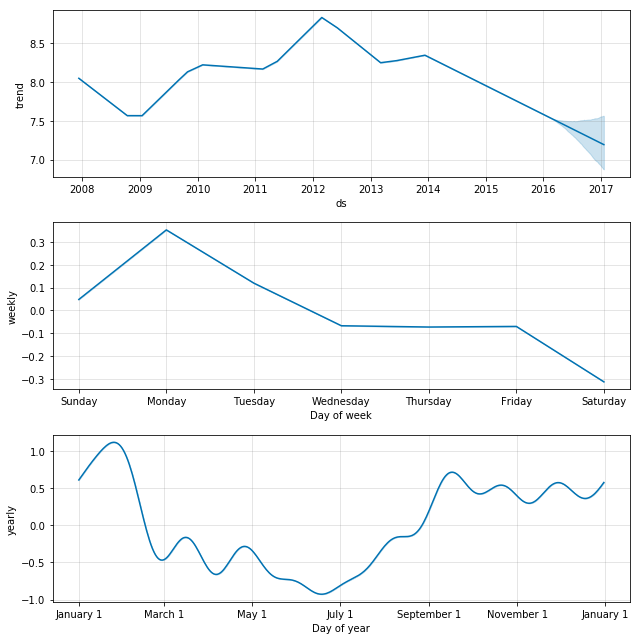

In [17]:
m.plot_components(forecast)